In [1]:
import numpy as np
%pip install scikit-fuzzy
import skfuzzy as fuzz
import matplotlib.pyplot as plt  
%matplotlib inline

     ------------------------------------- 994.0/994.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894084 sha256=c6892848511b4c148e6f4c0ff47fef32a57fd295f3ae7bdb8e0a5e3d1ec609c6
  Stored in directory: c:\users\msi15\appdata\local\pip\cache\wheels\49\7d\0b\d8426cdfc7fd0321111462d14dcfa2e2b5fa35936a496ee26c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [50]:
x_edad = np.arange(15.0, 80.0, 1)  
x_presupuesto = np.arange(5.0, 100.0, 1)  
x_puntuacion = np.arange(0.0, 10.0, 1)  



joven = fuzz.trapmf(x_edad,[15, 15, 25, 30])  
adulto = fuzz.trapmf(x_edad,[25, 30, 55, 60])  
anciano = fuzz.trapmf(x_edad,[55, 60, 80, 80])  

bajo = fuzz.trapmf(x_presupuesto,[5, 5, 15, 20])  
print(bajo)
alto = fuzz.trapmf(x_presupuesto,[15, 25, 100, 100])  
print(alto)


baja = fuzz.trapmf(x_puntuacion,[0, 0, 2, 3])  
media = fuzz.trapmf(x_puntuacion,[2, 3, 5, 6])  
alta = fuzz.trapmf(x_puntuacion,[5, 6, 7, 8]) 
muy_alta = fuzz.trapmf(x_puntuacion,[7, 8, 10,10])

     

[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.8 0.6 0.4 0.2 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1. ]


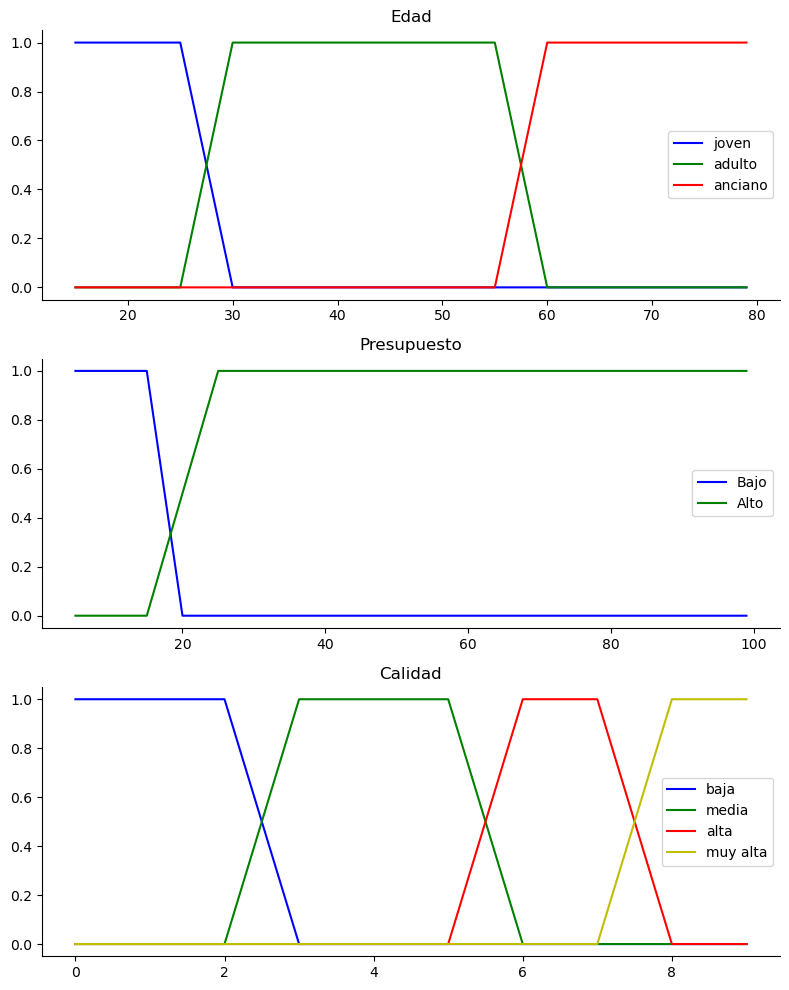

In [53]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))

ax0.plot(x_edad, joven, 'b', linewidth=1.5, label='joven')  
ax0.plot(x_edad, adulto, 'g', linewidth=1.5, label='adulto')  
ax0.plot(x_edad, anciano, 'r', linewidth=1.5, label='anciano')  
ax0.set_title('Edad')  
ax0.legend()  
	  
ax1.plot(x_presupuesto, bajo, 'b', linewidth=1.5, label='Bajo')  
ax1.plot(x_presupuesto, alto, 'g', linewidth=1.5, label='Alto')   
ax1.set_title('Presupuesto')  
ax1.legend()  
	  
ax2.plot(x_puntuacion, baja, 'b', linewidth=1.5, label='baja')  
ax2.plot(x_puntuacion, media, 'g', linewidth=1.5, label='media')  
ax2.plot(x_puntuacion, alta, 'r', linewidth=1.5, label='alta')  
ax2.plot(x_puntuacion, muy_alta, 'y', linewidth=1.5, label='muy alta')  
ax2.set_title('Calidad')  
ax2.legend()



for ax in (ax0, ax1, ax2):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  plt.tight_layout()
     

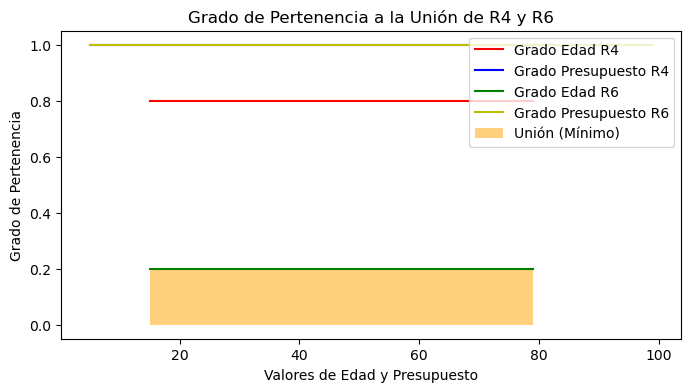

In [59]:
grado_activacion_edad_r4 = fuzz.interp_membership(x_edad, adulto, 56)
grado_activacion_presupuesto_r4 = fuzz.interp_membership(x_presupuesto, alto, 40)

# Evaluar el grado de activación de la regla R6
grado_activacion_edad_r6 = fuzz.interp_membership(x_edad, anciano, 56)
grado_activacion_presupuesto_r6 = fuzz.interp_membership(x_presupuesto, alto, 40)

# Tomar el mínimo grado de activación entre R4 y R6 para la unión
grado_activacion_union = min(grado_activacion_edad_r4, grado_activacion_presupuesto_r4, grado_activacion_edad_r6, grado_activacion_presupuesto_r6)

# Crear una gráfica para mostrar el grado de pertenencia a la unión
plt.figure(figsize=(8, 4))
plt.plot(x_edad, [grado_activacion_edad_r4] * len(x_edad), 'r', linewidth=1.5, label='Grado Edad R4')
plt.plot(x_presupuesto, [grado_activacion_presupuesto_r4] * len(x_presupuesto), 'b', linewidth=1.5, label='Grado Presupuesto R4')
plt.plot(x_edad, [grado_activacion_edad_r6] * len(x_edad), 'g', linewidth=1.5, label='Grado Edad R6')
plt.plot(x_presupuesto, [grado_activacion_presupuesto_r6] * len(x_presupuesto), 'y', linewidth=1.5, label='Grado Presupuesto R6')
plt.fill_between(x_edad, 0, grado_activacion_union, facecolor='orange', alpha=0.5, label='Unión (Mínimo)')
plt.title('Grado de Pertenencia a la Unión de R4 y R6')
plt.xlabel('Valores de Edad y Presupuesto')
plt.ylabel('Grado de Pertenencia')
plt.legend(loc='upper right')

plt.show()






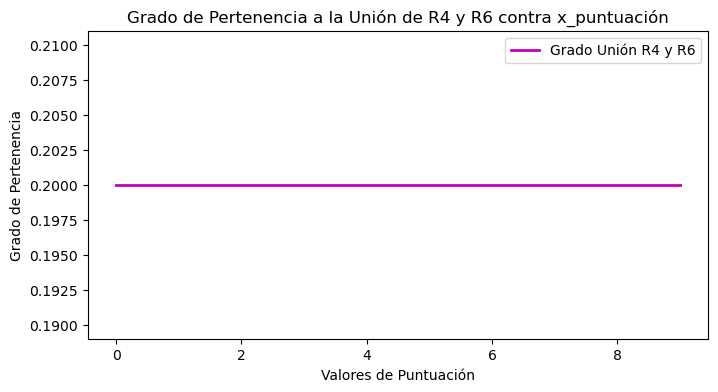

In [60]:
grado_activacion_edad_r4 = fuzz.interp_membership(x_edad, adulto, 56)
grado_activacion_presupuesto_r4 = fuzz.interp_membership(x_presupuesto, alto, 40)

# Evaluar el grado de activación de la regla R6
grado_activacion_edad_r6 = fuzz.interp_membership(x_edad, anciano, 56)
grado_activacion_presupuesto_r6 = fuzz.interp_membership(x_presupuesto, alto, 40)

# Tomar el mínimo grado de activación entre R4 y R6 para la unión
grado_activacion_union = min(grado_activacion_edad_r4, grado_activacion_presupuesto_r4, grado_activacion_edad_r6, grado_activacion_presupuesto_r6)

# Crear una gráfica para mostrar el grado de pertenencia a la unión
plt.figure(figsize=(8, 4))
plt.plot(x_puntuacion, [grado_activacion_union] * len(x_puntuacion), 'm', linewidth=2, label='Grado Unión R4 y R6')
plt.title('Grado de Pertenencia a la Unión de R4 y R6 contra x_puntuación')
plt.xlabel('Valores de Puntuación')
plt.ylabel('Grado de Pertenencia')
plt.legend(loc='upper right')

plt.show()


Valor recomendado para 'baja': 0.0
Valor recomendado para 'media': 0.0
Valor recomendado para 'alta': 0.0
Valor recomendado para 'muy_alta': 0.0
